# 1. Define binning and model

In [1]:
import glob
import numpy as np
import pandas
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from tqdm import tqdm
import pyhf
import cabinetry
cabinetry.set_logging()
import json
import yaml
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)
#pyhf.set_backend('numpy','minuit')

In [233]:
# Define the range and number of bins, 'p_D_l'
start = 0.8
end = 4.2
num_bins = 40

# Create the bin edges
bins = np.linspace(start, end, num_bins + 1)

# Check for empty bins
# empty_bins = [41, 42, 43, 44, 46, 47, 48, 49]

# Merge adjacent empty bins
# merged_bins = np.delete(bins, empty_bins)

In [234]:
# define cabinetry configuration
config = {
   "General":{
      "Measurement": "R_D_pDl",
      "POI": '$D\\tau\\nu$',              # parameter of interest, which we want to measure 
      "InputPath": "../Samples/Signal_MC14ri/{SamplePath}",       # where to find input data
      "HistogramFolder": "histograms/"

   }
}

config.update({
   "Regions":[
      {
         "Name": "signal_region",
         "Filter": '__weight__>0',                # event selection 
         "Variable": "p_D_l",  # which variable we bin histograms in
         "Binning": list(bins)
      }
   ]
})

config.update({
   "Samples":[
      {
         "Name": "Data",
         "Tree": "test",
         "SamplePath": ['MC14ri_sigDDst_foldex_e_7/D_tau_nu.root',
                        'MC14ri_sigDDst_foldex_e_7/Dst_tau_nu.root',
                        'MC14ri_normDDst_foldex_e_7/D_ell_nu.root',
                        'MC14ri_normDDst_foldex_e_7/Dst_ell_nu.root',
                        'MC14ri_normDDst_foldex_e_7/Dstst_ell_nu.root',
                        'MC14ri_Dststell2_foldex_e_7/Dstst_ell_nu.root',
                        'MC14ri_DststTau1_foldex_e_7/Dstst_tau_nu.root',
                        'MC14ri_DststTau2_foldex_e_7/Dstst_tau_nu.root',],
         "Data": True                       # observed data is handled differently, need to distinguish
      },
      {
         "Name": r'$D\tau\nu$',
         "Tree": "template",
         "SamplePath": ['MC14ri_sigDDst_foldex_e_7/D_tau_nu.root'],
         "Weight": '1'                 # weights: Monte Carlo integration, simulation correction etc.
      },
      {
         "Name": r'$D^\ast\tau\nu$',
         "Tree": "template",
         "SamplePath": ['MC14ri_sigDDst_foldex_e_7/Dst_tau_nu.root'],
         "Weight": '1'
      },
       {
         "Name": r'$D^{\ast\ast}\tau\nu$',
         "Tree": "template",
         #"Filter": "",
         "SamplePath": ['MC14ri_DststTau1_foldex_e_7/Dstst_tau_nu.root',
                        'MC14ri_DststTau2_foldex_e_7/Dstst_tau_nu.root'],
         "Weight": "1"                 # weights: Monte Carlo integration, simulation correction etc.
      },
       {
         "Name": r'$D\ell\nu$',
         "Tree": "template",
         "SamplePath": ['MC14ri_normDDst_foldex_e_7/D_ell_nu.root'],
         "Weight": '1'                 # weights: Monte Carlo integration, simulation correction etc.
      },
      {
         "Name": r'$D^\ast\ell\nu$',
         "Tree": "template",
         "SamplePath": ['MC14ri_normDDst_foldex_e_7/Dst_ell_nu.root'],
         "Weight": '1'
      },
       {
         "Name": r'$D^{\ast\ast}\ell\nu$',
         "Tree": "template",
         "SamplePath": ['MC14ri_normDDst_foldex_e_7/Dstst_ell_nu.root',
                        'MC14ri_Dststell2_foldex_e_7/Dstst_ell_nu.root'],
         "Weight": "1"                 # weights: Monte Carlo integration, simulation correction etc.
      }
   ]
})

config.update({"Systematics": []})

config.update({
   "NormFactors":[
      {
         "Name": '$D\\tau\\nu$',
         "Samples": r'$D\tau\nu$',    # we want this parameter to scale the signal
         "Nominal": 1,
         "Bounds": [0, 5]
      },
        {
         "Name": r'$D^\ast\tau\nu$',
         "Samples": r'$D^\ast\tau\nu$',
         "Nominal": 1,
         "Bounds": [0, 5]
      },
       {
         "Name": r'$D^{\ast\ast}\tau\nu$',
         "Samples": r'$D^{\ast\ast}\tau\nu$',
         "Nominal": 1,
         "Bounds": [0, 5]
      },
        {
         "Name": r'$D\ell\nu$',
         "Samples": r'$D\ell\nu$',
         "Nominal": 1,
         "Bounds": [0, 5]
      },
       {
         "Name": r'$D^\ast\ell\nu$',
         "Samples": r'$D^\ast\ell\nu$',
         "Nominal": 1,
         "Bounds": [0, 5]
      },
       {
         "Name": r'$D^{\ast\ast}\ell\nu$',
         "Samples": r'$D^{\ast\ast}\ell\nu$',
         "Nominal": 1,
         "Bounds": [0, 5]
      }
   ]
})


# config.update({
#    "Systematics":[
#       {
#          "Name": "Luminosity",
#          "Up": {"Normalization": 0.05},
#          "Down": {"Normalization": -0.05},
#          "Type": "Normalization"
#       },
#       {
#          "Name":"Modeling",
#          "Up": {"Tree": "B"},
#          "Down": {"Symmetrize": True},
#          "Samples": "signal",
#          "Type": "NormPlusShape"
#       },
#       {
#          "Name": "WeightBasedModeling",
#          "Up": {"Weight": "__weight__"},
#          "Down": {"Weight": "0.7*__weight__"},
#          "Samples": "qqbar",
#          "Type": "NormPlusShape"
#       }
#    ],
# })

In [235]:
cabinetry.configuration.validate(config)

True

In [236]:
cabinetry.configuration.print_overview(config)

INFO - cabinetry.configuration - the config contains:
INFO - cabinetry.configuration -   7 Sample(s)
INFO - cabinetry.configuration -   1 Regions(s)
INFO - cabinetry.configuration -   6 NormFactor(s)
INFO - cabinetry.configuration -   0 Systematic(s)


In [237]:
cabinetry.templates.build(config, method="uproot")

DEBUG - cabinetry.route -   in region signal_region
DEBUG - cabinetry.route -     reading sample Data
DEBUG - cabinetry.route -       variation Nominal
DEBUG - cabinetry.histo - saving histogram to histograms/signal_region_Data.npz
DEBUG - cabinetry.route -     reading sample $D\tau\nu$
DEBUG - cabinetry.route -       variation Nominal
WARNING - cabinetry.histo - signal_region_$D\tau\nu$ has empty bins: [35 36 38 39]
DEBUG - cabinetry.histo - saving histogram to histograms/signal_region_$D\tau\nu$.npz
DEBUG - cabinetry.route -     reading sample $D^\ast\tau\nu$
DEBUG - cabinetry.route -       variation Nominal
WARNING - cabinetry.histo - signal_region_$D^\ast\tau\nu$ has empty bins: [32 34 35 36 37 38 39]
DEBUG - cabinetry.histo - saving histogram to histograms/signal_region_$D^\ast\tau\nu$.npz
DEBUG - cabinetry.route -     reading sample $D^{\ast\ast}\tau\nu$
DEBUG - cabinetry.route -       variation Nominal
WARNING - cabinetry.histo - signal_region_$D^{\ast\ast}\tau\nu$ has empty bin

In [238]:
cabinetry.templates.postprocess(config)

DEBUG - cabinetry.route -   in region signal_region
DEBUG - cabinetry.route -     reading sample Data
DEBUG - cabinetry.route -       variation Nominal
DEBUG - cabinetry.histo - saving histogram to histograms/signal_region_Data_modified.npz
DEBUG - cabinetry.route -     reading sample $D\tau\nu$
DEBUG - cabinetry.route -       variation Nominal
WARNING - cabinetry.histo - signal_region_$D\tau\nu$ has empty bins: [35 36 38 39]
DEBUG - cabinetry.histo - saving histogram to histograms/signal_region_$D\tau\nu$_modified.npz
DEBUG - cabinetry.route -     reading sample $D^\ast\tau\nu$
DEBUG - cabinetry.route -       variation Nominal
WARNING - cabinetry.histo - signal_region_$D^\ast\tau\nu$ has empty bins: [32 34 35 36 37 38 39]
DEBUG - cabinetry.histo - saving histogram to histograms/signal_region_$D^\ast\tau\nu$_modified.npz
DEBUG - cabinetry.route -     reading sample $D^{\ast\ast}\tau\nu$
DEBUG - cabinetry.route -       variation Nominal
WARNING - cabinetry.histo - signal_region_$D^{\ast

INFO - cabinetry.visualize - visualizing histogram
INFO - cabinetry.visualize.utils - saving figure as figures/signal_region_prefit.pdf


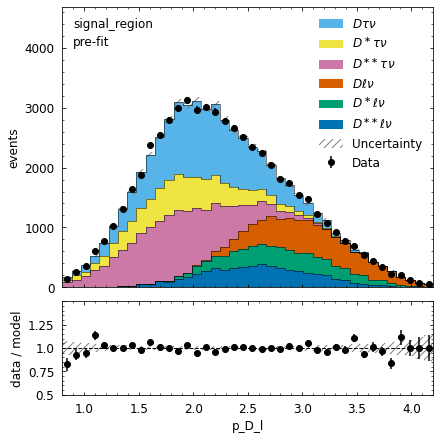

In [239]:
_ = cabinetry.visualize.data_mc_from_histograms(config)

# 2. Create a pyhf workspace

In [240]:
workspace_path = "R_D_pDl_workspace.json"
spec = cabinetry.workspace.build(config)
cabinetry.workspace.save(spec, workspace_path)

INFO - cabinetry.workspace - building workspace
DEBUG - cabinetry.workspace - adding NormFactor $D\tau\nu$ to sample $D\tau\nu$ in region signal_region
DEBUG - cabinetry.workspace - adding NormFactor $D^\ast\tau\nu$ to sample $D^\ast\tau\nu$ in region signal_region
DEBUG - cabinetry.workspace - adding NormFactor $D^{\ast\ast}\tau\nu$ to sample $D^{\ast\ast}\tau\nu$ in region signal_region
DEBUG - cabinetry.workspace - adding NormFactor $D\ell\nu$ to sample $D\ell\nu$ in region signal_region
DEBUG - cabinetry.workspace - adding NormFactor $D^\ast\ell\nu$ to sample $D^\ast\ell\nu$ in region signal_region
DEBUG - cabinetry.workspace - adding NormFactor $D^{\ast\ast}\ell\nu$ to sample $D^{\ast\ast}\ell\nu$ in region signal_region
INFO - pyhf.workspace - Validating spec against schema: workspace.json
DEBUG - cabinetry.workspace - saving workspace to R_D_pDl_workspace.json


In [241]:
print(json.dumps(spec, sort_keys=True, indent=4))

{
    "channels": [
        {
            "name": "signal_region",
            "samples": [
                {
                    "data": [
                        41.0,
                        66.0,
                        106.0,
                        128.0,
                        214.0,
                        290.0,
                        370.0,
                        487.0,
                        601.0,
                        739.0,
                        861.0,
                        1020.0,
                        1194.0,
                        1190.0,
                        1279.0,
                        1177.0,
                        1177.0,
                        1053.0,
                        937.0,
                        857.0,
                        726.0,
                        635.0,
                        505.0,
                        430.0,
                        358.0,
                        261.0,
                        199.0,
                  

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier $D\ell\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\tau\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\ell\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\tau\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\ell\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\tau\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier staterror_signal_region (40 new nuisance parameters)
INFO - cabinetry.visualize.utils - saving figure as figures/modifier_grid.pdf


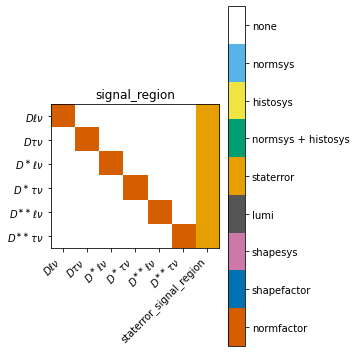

In [242]:
cabinetry.visualize.modifier_grid(pyhf.Workspace(spec).model())

In [243]:
model, data = cabinetry.model_utils.model_and_data(spec)

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier $D\ell\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\tau\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\ell\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\tau\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\ell\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\tau\nu$ (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier staterror_signal_region (40 new nuisance parameters)


# 3. MLE

In [244]:
fit_results = cabinetry.fit.fit(model=model, data=data)

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 184.2                      │             Nfcn = 5305              │
│ EDM = 3.53e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴───────

In [245]:
pyhf.set_backend('numpy','scipy')
parameters = pyhf.infer.mle.fit(data=data, pdf=model)
fit_results = cabinetry.fit.fit(model=model, data=data,init_pars=list(parameters))

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 184.2                      │             Nfcn = 2685              │
│ EDM = 1.37e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴───────

In [246]:
for label, result, unc in zip(fit_results.labels, fit_results.bestfit, fit_results.uncertainty):
    print(f"{label}: {result:.3f} +/- {unc:.3f}")

$D\ell\nu$: 0.939 +/- 0.118
$D\tau\nu$: 0.842 +/- 0.149
$D^\ast\ell\nu$: 1.170 +/- 0.576
$D^\ast\tau\nu$: 1.247 +/- 0.719
$D^{\ast\ast}\ell\nu$: 1.036 +/- 0.586
$D^{\ast\ast}\tau\nu$: 1.009 +/- 0.322
staterror_signal_region[0]: 0.902 +/- 0.059
staterror_signal_region[1]: 0.945 +/- 0.052
staterror_signal_region[2]: 0.969 +/- 0.040
staterror_signal_region[3]: 1.054 +/- 0.033
staterror_signal_region[4]: 1.008 +/- 0.027
staterror_signal_region[5]: 0.989 +/- 0.023
staterror_signal_region[6]: 0.988 +/- 0.021
staterror_signal_region[7]: 1.009 +/- 0.019
staterror_signal_region[8]: 0.982 +/- 0.017
staterror_signal_region[9]: 1.032 +/- 0.016
staterror_signal_region[10]: 1.005 +/- 0.015
staterror_signal_region[11]: 0.998 +/- 0.014
staterror_signal_region[12]: 0.987 +/- 0.014
staterror_signal_region[13]: 1.017 +/- 0.014
staterror_signal_region[14]: 0.981 +/- 0.014
staterror_signal_region[15]: 1.007 +/- 0.014
staterror_signal_region[16]: 0.983 +/- 0.014
staterror_signal_region[17]: 1.000 +/- 0.014


INFO - cabinetry.visualize.utils - saving figure as figures/pulls.pdf


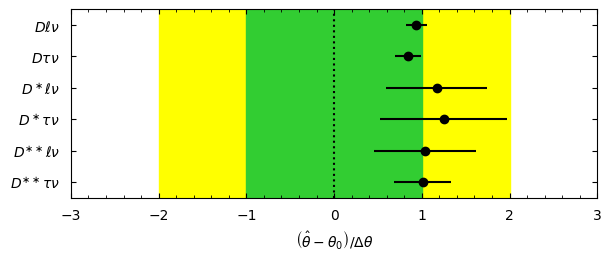

In [247]:
cabinetry.visualize.pulls(fit_results)

INFO - cabinetry.visualize.utils - saving figure as figures/correlation_matrix.pdf


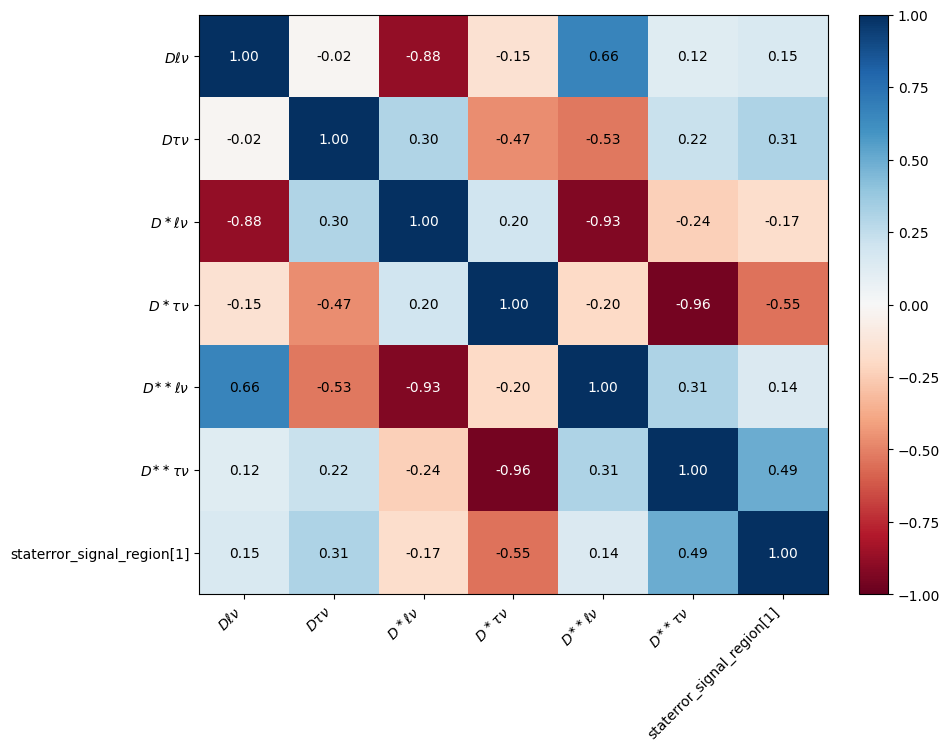

In [248]:
cabinetry.visualize.correlation_matrix(fit_results, pruning_threshold=0.4)

DEBUG - cabinetry.model_utils - total stdev is [[9.89, 13.6, 15, 18.5, 20.5, 24.3, ..., 13.8, 12.5, 10.6, 8.15, 6.23, 5.03]]
DEBUG - cabinetry.model_utils - total stdev per channel is [257]
INFO - cabinetry.visualize.utils - saving figure as figures/signal_region_postfit.pdf


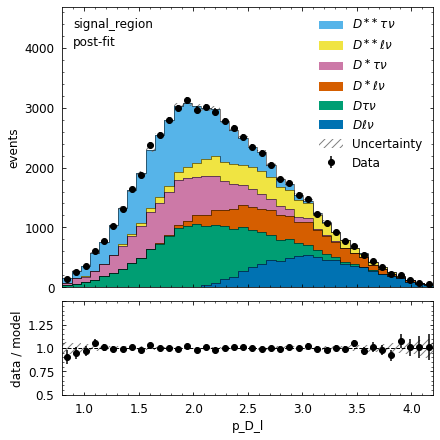

In [249]:
model_pred_postfit = cabinetry.model_utils.prediction(model, fit_results=fit_results)
_ = cabinetry.visualize.data_mc(model_pred_postfit, data, config=config)

# 4. Asimov and Toys

In [ ]:
asimov_data = cabinetry.model_utils.asimov_data(model)
_ = cabinetry.fit.fit(model, asimov_data)

In [97]:
# init the norm parameters
pars_toy = model.config.suggested_init()
#pars_toy[:6] = [0.5, 0.5]
print(f"init parameters: {list(zip(model.config.parameters, pars_toy))}")

# make the pdfs
pdf_toy = model.make_pdf(pyhf.tensorlib.astensor(pars_toy))

# note: pdf.sample takes in a "shape" N=(10000,) given the number of samples
n_samples = 10
mc_toy = pdf_toy.sample((n_samples,))

print(mc_toy.shape)

init parameters: [('$D\\ell\\nu$', 1), ('$D\\tau\\nu$', 1), ('$D^\\ast\\ell\\nu$', 1), ('$D^\\ast\\tau\\nu$', 1), ('$D^{\\ast\\ast}\\ell\\nu$', 1), ('$D^{\\ast\\ast}\\tau\\nu$', 1), ('staterror_signal_region', 1.0)]
(10, 72)


In [98]:
init_pars = model.config.suggested_init()
par_bounds = model.config.suggested_bounds()
fixed_params = model.config.suggested_fixed()

qtilde_sig = pyhf.tensorlib.astensor(
    [
        pyhf.infer.test_statistics.tmu(
            1.0, mc, model, init_pars, par_bounds, fixed_params
        )
        for mc in mc_toy
    ]
)

WARNING - pyhf.infer.test_statistics - tmu test statistic used for fit configuration with POI bounded at zero.
Use the tmu_tilde test statistic (pyhf.infer.test_statistics.tmu_tilde) instead.
WARNING - pyhf.infer.test_statistics - tmu test statistic used for fit configuration with POI bounded at zero.
Use the tmu_tilde test statistic (pyhf.infer.test_statistics.tmu_tilde) instead.
WARNING - pyhf.infer.test_statistics - tmu test statistic used for fit configuration with POI bounded at zero.
Use the tmu_tilde test statistic (pyhf.infer.test_statistics.tmu_tilde) instead.
WARNING - pyhf.infer.test_statistics - tmu test statistic used for fit configuration with POI bounded at zero.
Use the tmu_tilde test statistic (pyhf.infer.test_statistics.tmu_tilde) instead.
WARNING - pyhf.infer.test_statistics - tmu test statistic used for fit configuration with POI bounded at zero.
Use the tmu_tilde test statistic (pyhf.infer.test_statistics.tmu_tilde) instead.
WARNING - pyhf.infer.test_statistics - t

In [65]:
#init=[0.5, 0.5] + [1]*50
toys = model.make_pdf(pyhf.tensorlib.astensor(np.asarray(init))).sample((1,))
_ = cabinetry.fit.fit(model=model, data=toys[0])

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 248                        │             Nfcn = 4108              │
│ EDM = 0.000116 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴───────